<a href="https://colab.research.google.com/github/sonali2828/student_marks/blob/main/Equipment_failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Equipment Failure Predictor

In [ ]:
# Basic data libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn for ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
# Simulate dummy sensor data
np.random.seed(42)

data = pd.DataFrame({
    'sensor_1': np.random.normal(0, 1, 1000),
    'sensor_2': np.random.normal(5, 2, 1000),
    'sensor_3': np.random.normal(10, 3, 1000),
    'sensor_4': np.random.normal(7, 1, 1000),
    'failure': np.random.choice([0,1], size=1000, p=[0.8,0.2])
})

data.head()



,sensor_1,sensor_2,sensor_3,sensor_4,failure
0,0.496714,7.798711,7.974465,5.092192,0
1,-0.138264,6.849267,9.566444,6.139615,0
2,0.647689,5.119261,7.622740,6.586394,1
3,1.523030,3.706126,9.076115,8.887688,0
4,-0.234153,6.396447,4.319156,7.556553,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sensor_1  1000 non-null   float64
 1   sensor_2  1000 non-null   float64
 2   sensor_3  1000 non-null   float64
 3   sensor_4  1000 non-null   float64
 4   failure   1000 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 39.2 KB


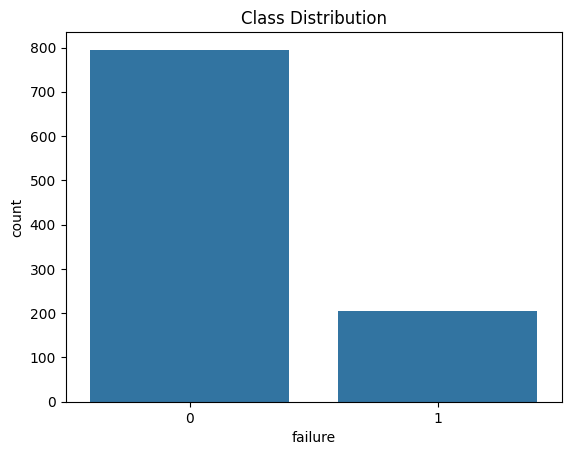

In [ ]:
data.info()
data.describe()
data['failure'].value_counts()
sns.countplot(x='failure', data=data)
plt.title("Class Distribution")
plt.show()


In [ ]:
X = data.drop('failure', axis=1)
y = data['failure']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred = clf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.81

Confusion Matrix:
 [[158   1]
 [ 37   4]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.99      0.89       159
           1       0.80      0.10      0.17        41

    accuracy                           0.81       200
   macro avg       0.81      0.55      0.53       200
weighted avg       0.81      0.81      0.75       200



In [ ]:
new_sample_df = pd.DataFrame(
    [[0.2, 4.8, 11, 6.5]],
    columns=X.columns
)
new_sample_scaled = scaler.transform(new_sample_df)
prediction = clf.predict(new_sample_scaled)
print("Prediction (0=No Failure, 1=Failure):", prediction[0])


Prediction (0=No Failure, 1=Failure): 0
